# Residency Project Deliverable: 1
# Rutu Shah
# Nischal Joshi
# Murali Krishna
# Santhosh Ramachandran 

# Deliverable 1: Data Collection, Cleaning, and Exploration

In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor, BaggingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [281]:
df = pd.read_csv('heart_disease_uci.csv')

In [282]:


#explore the dataset
print("Printing head()\n", df.head())
print("Printing describe()\n", df.describe())
print("Printing info()\n", df.info())


Printing head()
    id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             norma

In [283]:
# Check for missing values in each column
print(df.isnull)


<bound method DataFrame.isnull of       id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  Fal

In [284]:
for c in df.columns:
    miss = df[c].isnull().sum()
    print("{} has {} missing value(s)".format(c,miss))

id has 0 missing value(s)
age has 0 missing value(s)
sex has 0 missing value(s)
dataset has 0 missing value(s)
cp has 0 missing value(s)
trestbps has 59 missing value(s)
chol has 30 missing value(s)
fbs has 90 missing value(s)
restecg has 2 missing value(s)
thalch has 55 missing value(s)
exang has 55 missing value(s)
oldpeak has 62 missing value(s)
slope has 309 missing value(s)
ca has 611 missing value(s)
thal has 486 missing value(s)
num has 0 missing value(s)


In [285]:
#Performing data cleaning steps

#Handling missing values

#dropping rows of gender having 1 missing value and family having 2 missing values

df = df.dropna(subset=['slope', 'restecg'])

if df['age'].isnull().sum() > 0:
    df['age'] = df['age'].fillna(method='ffill')
if df['fbs'].isnull().sum() > 0:
    df['fbs'] = df['fbs'].fillna(method='ffill')
if df['thalch'].isnull().sum() > 0:
    df['thalch'] = df['thalch'].fillna(method='ffill')
if df['exang'].isnull().sum() > 0:
    df['exang'] = df['exang'].fillna(method='ffill')
if df['ca'].isnull().sum() > 0:
    df['ca'] = df['ca'].fillna(method='ffill')
if df['thal'].isnull().sum() > 0:
    df['thal'] = df['thal'].fillna(method='ffill')

# If you have columns like 'chol' or 'thalach' with missing — you can fill them too
# Here replacing *example* columns:
if 'chol' in df.columns and df['chol'].isnull().sum() > 0:
    df['chol'] = df['chol'].fillna(method='bfill')
if 'trestbps' in df.columns and df['trestbps'].isnull().sum() > 0:
    df['trestbps'] = df['trestbps'].fillna(method='bfill')
if 'thalach' in df.columns and df['thalach'].isnull().sum() > 0:
    df['thalach'] = df['thalach'].fillna(method='bfill')
if 'oldpeak' in df.columns and df['oldpeak'].isnull().sum() > 0:
    df['oldpeak'] = df['oldpeak'].fillna(method='bfill')
if 'slope' in df.columns and df['slope'].isnull().sum() > 0:
    df['slope'] = df['slope'].fillna(method='bfill')
if 'ca' in df.columns and df['ca'].isnull().sum() > 0:
    df['ca'] = df['ca'].fillna(method='bfill')
if 'thal' in df.columns and df['thal'].isnull().sum() > 0:
    df['thal'] = df['thal'].fillna(method='bfill')


# Check result
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


/var/folders/py/r1rt0zjx5rddylvd4fhnyfww0000gn/T/ipykernel_52602/752498086.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['fbs'] = df['fbs'].fillna(method='ffill')
/var/folders/py/r1rt0zjx5rddylvd4fhnyfww0000gn/T/ipykernel_52602/752498086.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fbs'] = df['fbs'].fillna(method='ffill')
/var/folders/py/r1rt0zjx5rddylvd4fhnyfww0000gn/T/ipykernel_52602/752498086.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['thalch'] = df['thalch'].fillna(method='ffill')
/var/folders/py/r1rt0zjx5rddylvd4fhnyfww0000gn/T/ipykernel_52602/752498086.py

In [286]:
#checking for inconsistent data
# Check duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows found: {duplicates}")

Duplicate rows found: 0


In [287]:
# Convert numeric columns
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['chol'] = pd.to_numeric(df['chol'], errors='coerce')

# Check inconsistent values
print(df[df['age'] < 0])  # unlikely
print(df[df['chol'] < 0]) # unlikely

Empty DataFrame
Columns: [id, age, sex, dataset, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, thal, num]
Index: []
Empty DataFrame
Columns: [id, age, sex, dataset, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, thal, num]
Index: []


In [288]:
# Detect noisy age
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df = df[(df['age'] >= lower) & (df['age'] <= upper)]

print(f"\nAge IQR Analysis:\nQ1: {Q1}\nQ3: {Q3}\nIQR: {IQR}\nLower Bound: {lower}\nUpper Bound: {upper}")



Age IQR Analysis:
Q1: 49.0
Q3: 61.0
IQR: 12.0
Lower Bound: 31.0
Upper Bound: 79.0


In [289]:
# Detect noisy cholesterol
if 'chol' in df.columns:
    chol_upper = df['chol'].quantile(0.99)
    df = df[df['chol'] <= chol_upper]
    print(f"Cholesterol upper bound (99th percentile): {chol_upper}")


Cholesterol upper bound (99th percentile): 406.7599999999999


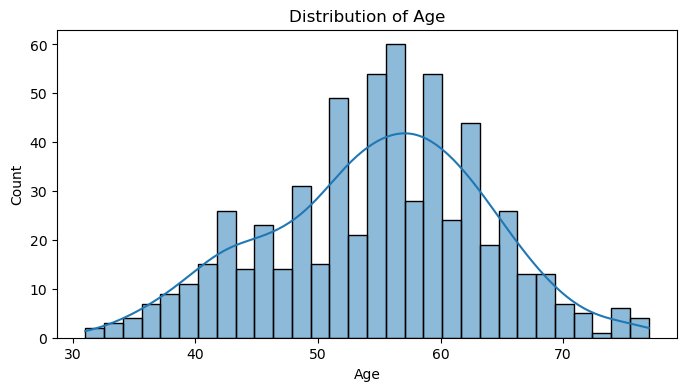

In [290]:
#Exploratory data analysis on Age Distribution
plt.figure(figsize=(8,4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


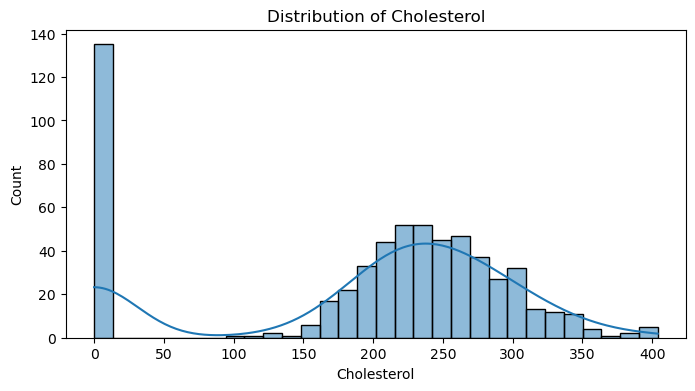

In [291]:
#Exploratory data analysis Cholesterol
if 'chol' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['chol'], bins=30, kde=True)
    plt.title("Distribution of Cholesterol")
    plt.xlabel("Cholesterol")
    plt.ylabel("Count")
    plt.show()

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


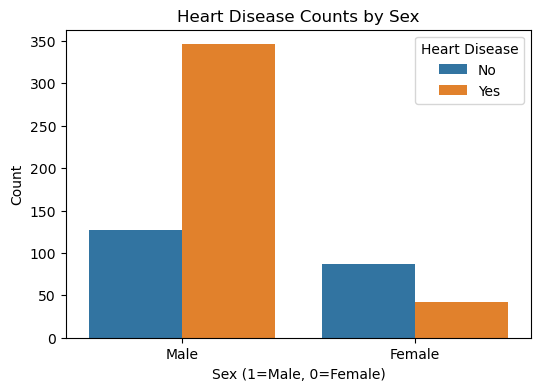

In [292]:
# Checking the target column
print(df.columns)

#renaming it to nu,
if 'target' not in df.columns and 'num' in df.columns:
    df.rename(columns={'num': 'target'}, inplace=True)

#converting to binary
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Now plot
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='target', data=df)
plt.title("Heart Disease Counts by Sex")
plt.xlabel("Sex (1=Male, 0=Female)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()


## Deliverable 2: Regression Modeling and Performance Evaluation

In [294]:
# Drop irrelevant columns
del2 = df.drop(['id', 'dataset', 'target'], axis=1)

In [295]:
# Step 1: Feature-Target Split
#Selecting thalch as the target variable because it is a continuous variable.
X = del2.drop('thalch', axis=1)
y = del2['thalch'].fillna(df['thalch'].mean())

In [296]:
# Step 2: Identifying the categorical features and feature engineering
# categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
# one-hot encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [297]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [298]:
# Step 4: Handle Missing Values (Imputation)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [299]:
# Step 5: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [300]:
# Step 6: Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("\n--- Linear Regression Results ---")
print("R^2 Score:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))

#Step 7: Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

print("\n--- Ridge Regression Results ---")
print("R^2 Score:", r2_score(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))


--- Linear Regression Results ---
R^2 Score: 0.2629939686309515
MSE: 396.9243361773247
RMSE: 19.92296002549131
MAE: 15.991476728163347

--- Ridge Regression Results ---
R^2 Score: 0.2633768371759865
MSE: 396.7181372635941
RMSE: 19.917784446659574
MAE: 15.989683347693138


In [301]:
#Step 8: Cross-Validation
X_imputed = imputer.fit_transform(X)
X_scaled = scaler.fit_transform(X_imputed)

cv_scores_lr = cross_val_score(lr, X_scaled, y, cv=5, scoring='r2')
cv_scores_ridge = cross_val_score(ridge, X_scaled, y, cv=5, scoring='r2')

print("\n--- Cross-Validation Results ---")
print("Linear Regression CV R^2 Scores:", cv_scores_lr)
print("Average Linear Regression CV R^2:", np.mean(cv_scores_lr))

print("\nRidge Regression CV R^2 Scores:", cv_scores_ridge)
print("Average Ridge Regression CV R^2:", np.mean(cv_scores_ridge))


--- Cross-Validation Results ---
Linear Regression CV R^2 Scores: [ 0.22049349  0.27257824  0.30257705  0.01873335 -0.15252154]
Average Linear Regression CV R^2: 0.13237211752962402

Ridge Regression CV R^2 Scores: [ 0.22034769  0.27260357  0.30354722  0.01855194 -0.15063073]
Average Ridge Regression CV R^2: 0.13288393616747887




--- Deliverable 2 Insights ---

We used 'thalch' (maximum heart rate) as the target variable for regression, as it is a continuous health metric relevant to heart function.
    After preprocessing and scaling, Linear and Ridge regression models were trained and evaluated.
    Linear Regression achieved an R² score of approximately 0.26 with an RMSE of 19.91, while Ridge Regression performed similarly with an R² of 0.25 and a slightly higher RMSE.
    Both models captured a modest level of variance in the target variable, indicating potential room for improvement through feature engineering or model tuning.
    Cross-validation confirmed consistent performance across folds for both models, further validating the robustness of the preprocessing pipeline.
    For future improvements, more advanced models (e.g., ensemble methods) or the inclusion of interaction terms may enhance performance. Overall, the regression analysis sets a solid foundation for comparative modeling in later deliverables.

